In [1]:
import matplotlib
#matplotlib.use('QT4Agg')
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as Figure
#from matplotlib.backends.backend_qt4agg import FigureCanvasQTAgg as FigureCanvas
import pylab
import sys
import os
#pylab.rcParams['figure.figsize'] = (8.0, 10.0)
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from skimage.draw import polygon
import json
import matplotlib.image as mpimg

#path to COCO images
coco_dir = 'coco/images/'
annotation_dir = 'coco/'
dataType = 'val2014'
annFile='{}/annotations/instances_{}.json'.format(annotation_dir,dataType)
cocoImgDir = '{}/images/{}/'.format(annotation_dir, dataType)

In [2]:
# initialize COCO api for instance annotations
dataset_type = 'instances'
dataset = json.load(open(annFile, 'r'))

#not sure why this field not saved in my annotations?  But adding it here.
if 'type' not in dataset.keys():
    dataset['type'] = dataset_type
    with open(annFile, 'w') as outfile:
        json.dump(dataset, outfile)

coco=COCO(annFile)

loading annotations into memory...
0:00:05.326429
creating index...
index created!


In [3]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms='person');
person_id = catIds[0]
imgIds = coco.getImgIds(catIds=person_id);
imgId = imgIds[np.random.randint(0,len(imgIds))]
#imgId = 512657
img = coco.loadImgs(imgId)[0]

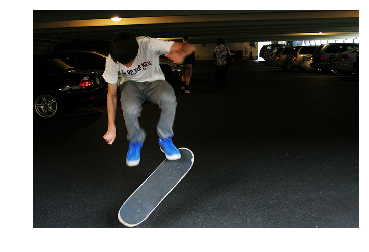

In [4]:
# load and display image
fig = plt.figure(frameon=False)
I=mpimg.imread('%s/COCO_%s_%012d.jpg' %(cocoImgDir, dataType, imgId))
plt.axis('off')
plt.imshow(I)

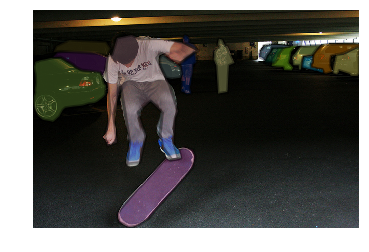

In [5]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [6]:
def get_polygons(anns, catIds=[]):
    polygons = []
    for ann in anns:
        if ann['category_id'] in catIds:
            # polygon
            for seg in ann['segmentation']:
                poly = np.array(seg).reshape((len(seg)/2, 2))
                polygons.append(Polygon(poly, True,alpha=0.4))
    return polygons    

In [7]:
#get stuff to process image
colors = (0,0,0,1)
color_option = 'average' #other option 'black''
lines = open('../data/img_names.txt', 'r').readlines()
imgIds = [int(line) for line in lines]
imgIds = list(set(imgIds) & set(coco.getImgIds()))

21/10923

/home/lisaanne/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


29/10923

KeyboardInterrupt: 

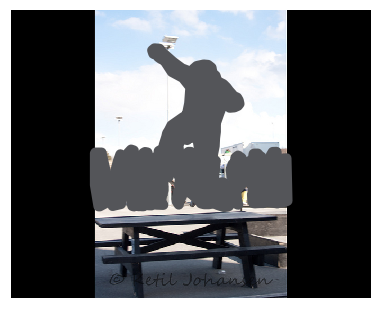

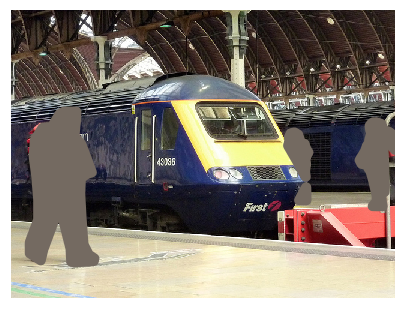

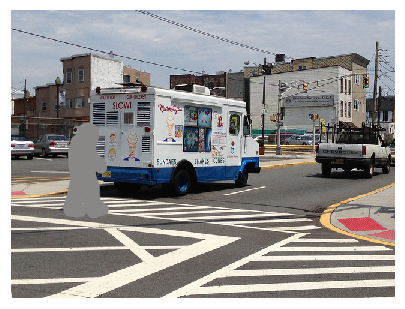

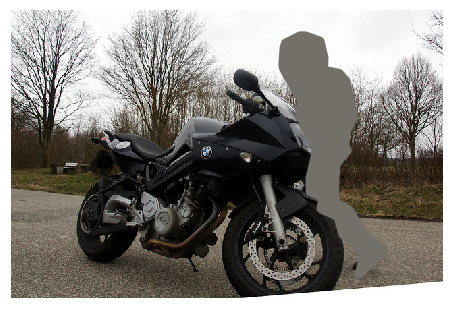

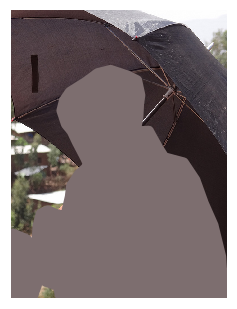

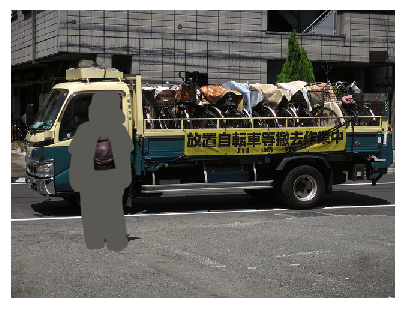

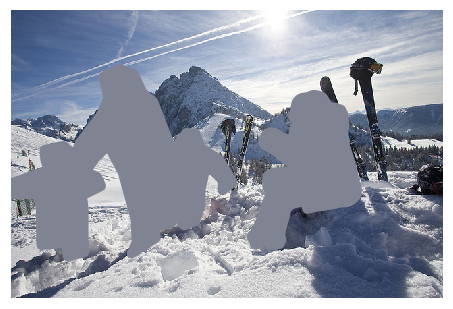

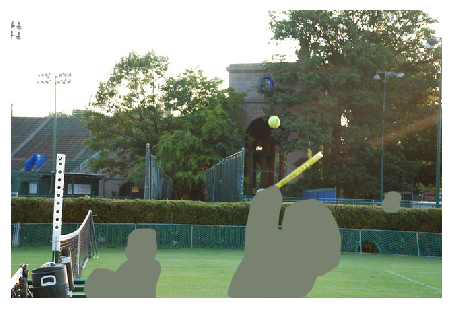

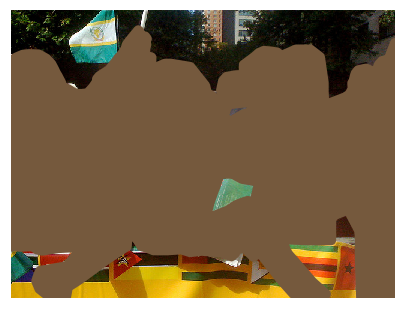

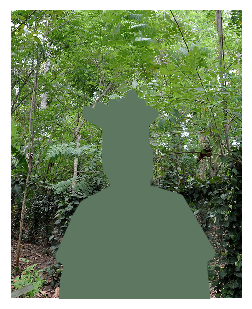

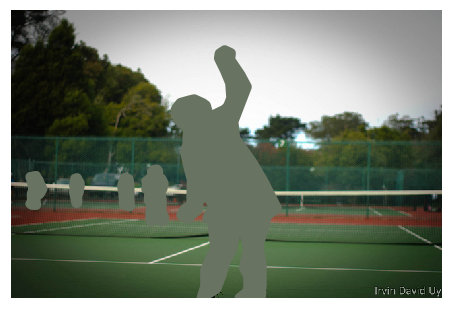

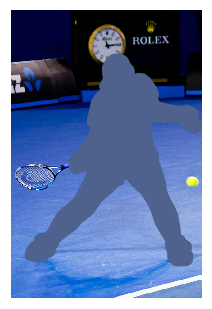

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [15]:
save_dir = '../im2txt/data/blocked_images_%s/' %color_option
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

for i, imgId in enumerate(imgIds):
    sys.stdout.write('\r%d/%d' %(i, len(imgIds)))
    img = coco.loadImgs(imgId)[0]
    save_file = '%s/%d_%s.png' %(save_dir, img['id'], color_option)
    if not os.path.isfile(save_file):
        
        fig = Figure()
        #canvas = FigureCanvas(fig)
        ax = fig.gca()

        
        I=mpimg.imread('%s/COCO_%s_%012d.jpg' %(cocoImgDir, dataType, imgId))
        # load and display instance annotations
        plt.cla()
        plt.imshow(I); #plt.axis('off')
        annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=False)
        anns = coco.loadAnns(annIds)
        polygons = get_polygons(anns, [person_id])

        #code to make color average of scene
        if color_option == 'average':
            colors = []
            if I.ndim == 2:
                I = np.tile(I[..., np.newaxis], (1, 1, 3))
            for channel in range(3):
                colors.append(np.mean(I[:,:,channel])/255.)
        p = PatchCollection(polygons, facecolors=tuple(colors), edgecolors=tuple(colors), linewidths=10)

        ax = plt.gca()
        ax.add_collection(p)
        ax.set_axis_off()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


        ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
        ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator())

        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                    hspace = 0, wspace = 0)

        plt.savefig(save_file, bbox_inches='tight', pad_inches=-0.05)

In [ ]:
os.environ.get('DISPLAY')

In [ ]:
FigureCanvas()